<a href="https://colab.research.google.com/github/srilamaiti/spring_2023_w266_final_project_heesuk_iris_srila/blob/main/iris/W266_essay_evaluation_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing new libraries**

In [2]:
!pip install transformers
!pip install emoji==0.6.0
!pip install scikit-multilearn
!pip install iterative-stratification
!pip install tensorflow==2.11.0
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing libraries**

In [3]:
import transformers
print(f'transformers version: {transformers.__version__}')
from transformers import logging as hf_logging
from transformers import BertTokenizer, TFBertModel
from transformers import TFAutoModel, AutoTokenizer
hf_logging.set_verbosity_error()
'''
import nltk
from nltk.tokenize import sent_tokenize
import spacy      
from spacy import displacy
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
nltk.download('punkt')
'''
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from transformers import RobertaTokenizer, TFRobertaModel
ROBERTA_MODEL_CHKPT = "roberta-base"
BERTWEET_MODEL_CHKPT = "vinai/bertweet-base"
BERT_MODEL_CHKPT = 'bert-base-cased'

# Other required libraries
import math
import os
import pandas as pd
import numpy as np
import re
import copy
import sys
import gc
import pprint

# data visualization
from matplotlib import cm
import matplotlib.pyplot as plt
from IPython.display import Image

# others
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import set_link_color_palette
from scipy.cluster.hierarchy import linkage
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from skmultilearn.model_selection import iterative_train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

# distances
from scipy.spatial.distance import pdist, squareform

import warnings
warnings.filterwarnings("ignore")

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.layer_utils import count_params
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.losses import mae
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.losses import binary_crossentropy
from keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from keras.models import load_model
from tensorflow.keras.optimizers import Adam, SGD

import torch
import torch
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import get_linear_schedule_with_warmup
print(tf.__version__)

transformers version: 4.27.4
2.11.0


# **General functions**

## **Rounding Off to Custom Decimal Places**

In [4]:
def roundPartial(value, resolution):
    return round (value / resolution) * resolution

## **Set parameters**

In [5]:
def set_config_param(seed = 99):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.keras.backend.clear_session()
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Colab Notebooks"
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_columns', None)
    
    
set_config_param(20230214)

## **Plot loss and accuracy**

In [6]:
def plot_loss_accuracy(history, col_list):
    fig, ax = plt.subplots(2, 6, figsize=(16, 6), sharex='col', sharey='row')
    fig.tight_layout(pad=5.0)
    for idx, col in enumerate(col_list):

        ax[0, idx].plot(history[col + '_loss'], lw=2, color='darkgoldenrod')
        ax[0, idx].plot(history['val_' + col + '_loss'], lw=2, color='indianred')
        #ax[0, idx].legend(loc='center left')
        ax[0, idx].legend(['Train', 'Validation'], fontsize=5)
        ax[0, idx].set_xlabel('Epochs', size=10)
        ax[0, idx].set_title('Loss: ' + col)

        ax[1, idx].plot(history[col + '_accuracy'], lw=2, color='darkgoldenrod')
        ax[1, idx].plot(history['val_' + col + '_accuracy'], lw=2, color='indianred')
        #ax[0, idx].legend(loc='center left')
        ax[1, idx].legend(['Train', 'Validation'], fontsize=5)
        ax[1, idx].set_xlabel('Epochs', size=10)
        ax[1, idx].set_title('Accuracy: ' + col)

## **Plot Loss and other KPI specified**

In [7]:
def custom_plot(df, kpi_name, kpi_string):
    x_arr = np.arange(len(df['loss'])) + 1
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(x_arr, df['loss'], '-o', label = 'Train loss')
    ax.plot(x_arr, df['val_loss'], '--<', label = 'Validation loss')
    ax.legend(fontsize = 15)
    ax.set_xlabel('Epoch', size = 15)
    ax.set_ylabel('Loss', size = 15)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(x_arr, df[kpi_name], '-o', label = 'Train ' + kpi_string)
    ax.plot(x_arr, df['val_' + kpi_name], '--<', label = 'Validation ' + kpi_string)
    ax.legend(fontsize = 15)
    ax.set_xlabel('Epoch', size = 15)
    ax.set_ylabel(kpi_name, size = 15)
    #ax.set_ylim(0,1)
    plt.show()

## **Text Encode**

In [8]:
def text_encode(texts, tokenizer, max_len):
    input_ids = []
    # token_type_ids = []
    attention_mask = []
    
    for text in texts:
        token = tokenizer(text, 
                          max_length = max_len, 
                          truncation = True, 
                          padding = 'max_length',
                          add_special_tokens = True)
        input_ids.append(token['input_ids'])
        # token_type_ids.append(token['token_type_ids'])
        attention_mask.append(token['attention_mask'])
    
    return np.array(input_ids), np.array(attention_mask)

## **Custom metric**

In [9]:
def MCRMSE(y_true, y_pred):
    colwise_mse = tf.reduce_mean(tf.square(y_true - y_pred), axis = 1)
    return tf.reduce_mean(tf.sqrt(colwise_mse), axis = -1, keepdims = True)

## **Build Base Model**

In [10]:
def build_regression_model(loss = 'MCRMSE',
                           model_name = 'Roberta', 
                           dense_dim = 6, 
                           MAX_LEN = 512,
                           learning_rate = 1e-5,
                           dropout = .1,
                           number_of_hidden_layers = 1,
                           hidden_layer_node_count = 64,
                           retrain_layer_count = 0):
    
    # Define inputs
    input_ids = tf.keras.Input(shape = (MAX_LEN ,), dtype = 'int64', name = 'input_ids')
    attention_masks = tf.keras.Input(shape = (MAX_LEN ,), dtype = 'int64', name = 'attention_masks')
    
    if model_name == 'Roberta':
        model_tokenizer = RobertaTokenizer.from_pretrained(ROBERTA_MODEL_CHKPT)
        model = TFRobertaModel.from_pretrained(ROBERTA_MODEL_CHKPT)
    elif model_name == 'Bertweet':
        model_tokenizer = AutoTokenizer.from_pretrained(BERTWEET_MODEL_CHKPT)
        model = TFRobertaModel.from_pretrained(BERTWEET_MODEL_CHKPT)
    elif model_name == 'Bert':
        model_tokenizer = BertTokenizer.from_pretrained(BERT_MODEL_CHKPT)
        model = TFBertModel.from_pretrained(BERT_MODEL_CHKPT)  

    # Adjust the trainable layer weights based on retrain_layer_count
    # If retrain_layer_count is 0, then base model is frozen.
    # If retrain_layer_count is 12, then the entire base model is trainable.
    # And that implies that all the pretrained weights are lost and it relearns
    # from the input data.
    # If retrain_layer_count is between 1 and 11, then the last n layers of
    # the pretrained model retrained.
    if retrain_layer_count == 0:
        # The pretained model is frozen
        model.trainable = False           

    elif retrain_layer_count == 12:  
        # The pretrained model is retrained thru all layers.       
        model.trainable = True     

    else:    
        # Restrict training to the num_train_layers outer transformer layers
        retrain_layer_list = []
        model.trainable = False  
        for retrain_layer_number in range(retrain_layer_count):

            layer_code = '_' + str(11 - retrain_layer_number)
            retrain_layer_list.append(layer_code)
        
        print('Retrain layers: \n', retrain_layer_list)
        #model.compile()
        print(f"Number of trainable parameters : {count_params(model.trainable_weights)}")
        print(f"Number of non-trainable parameters : {count_params(model.non_trainable_variables)}")
        for weight in model.weights:
            weight._trainable = False
            #print("***", layer.name, layer._trainable)
            if 'layer_' in weight.name and weight.name.split(".")[1].split("/")[0] in retrain_layer_list:
                weight._trainable = True
                # print("$$$", weight.name, weight._trainable)
            elif 'layer_' not in weight.name :
                weight._trainable = True
                # print("###", weight.name, weight._trainable)
        model.compile()

        for weight_details in model.weights:
            print(weight_details.name, weight_details.trainable)
    print(f"Number of trainable parameters : {count_params(model.trainable_weights)}")
    print(f"Number of non-trainable parameters : {count_params(model.non_trainable_variables)}")
                
    # Insert pretrained model layer
    pretrained_transformer = model([input_ids, attention_masks])

    # Get the CLS output off the pretrained model
    cls_token = pretrained_transformer[0][:, 0, :]

    # Append the hidden layer and dropout layer
    layer_list = []
    for layer in range(number_of_hidden_layers):
        if layer == 0:
            hidden_layer = tf.keras.layers.Dense(units      = hidden_layer_node_count
                                               , activation = 'relu'
                                               , name       = 'hidden_layer_' + str(layer + 1)
                                                )(cls_token)
        else:
            hidden_layer = tf.keras.layers.Dense(units      = hidden_layer_node_count
                                               , activation = 'relu'
                                               , name       = 'hidden_layer_' + str(layer + 1)
                                            )(layer_list[-1])
        layer_list.append(hidden_layer)
        dropout_layer = tf.keras.layers.Dropout(dropout, 
                                                name = 'dropout_layer_' + str(layer + 1)
                                               )(hidden_layer) 
        layer_list.append(dropout_layer)

    # Add the output layer
    output = tf.keras.layers.Dense(6,)(layer_list[-1])

    # Build the final model
    regression_model = tf.keras.Model(inputs = [input_ids, attention_masks], outputs = output)
    
    # Model compile
    if loss == 'MCRMSE':
        regression_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
                                 loss      = MCRMSE,
                                 metrics   = MCRMSE
                                )
    
    print(regression_model.summary())
    keras.utils.plot_model(regression_model, 
                           show_shapes = False, 
                           show_dtype = False, 
                           show_layer_names = True, 
                           dpi = 90)
    return regression_model

In [11]:
def model_fit(model, 
              df_train, 
              train_indices,
              val_indices,
              model_name = 'Roberta', 
              MAX_LEN = 512,
              epochs = 5,
              batch_size = 4,
              validation_split = .2):
  
    # Building the tokenizer for the given model
    if model_name == 'Roberta':
        tokenizer = RobertaTokenizer.from_pretrained(ROBERTA_MODEL_CHKPT)
    elif model_name == 'Bertweet':
        tokenizer = AutoTokenizer.from_pretrained(BERTWEET_MODEL_CHKPT)
        
    train_encoded_input_ids, train_encoded_attention_masks = text_encode(df_train.iloc[list(train_indices)]['full_text'], tokenizer, MAX_LEN)
    val_encoded_input_ids, val_encoded_attention_masks = text_encode(df_train.iloc[list(val_indices)]['full_text'], tokenizer, MAX_LEN)

    y_train = np.array(df_train.iloc[list(train_indices)][label_cols], dtype = "float32")
    y_val = np.array(df_train.iloc[list(val_indices)][label_cols], dtype = "float32")
    
    hist = model.fit([train_encoded_input_ids, train_encoded_attention_masks],
                     y_train,
                     validation_data = ([val_encoded_input_ids, val_encoded_attention_masks], 
                                        y_val
                                       ),
                     batch_size = batch_size,        
                     epochs = epochs
                    )

    df_history = pd.DataFrame(hist.history)
    return df_history

In [12]:
def build_base_model(model_layer, learning_rate, dense_dim = 6):
    
    #define inputs
    input_ids = tf.keras.Input(shape = (MAX_LEN ,), dtype = 'int64', name = 'input_ids')
    attention_masks = tf.keras.Input(shape = (MAX_LEN ,), dtype = 'int64', name = 'attention_masks')
    
    #insert BERT layer
    transformer_layer = model_layer([input_ids, attention_masks])
    
    #choose only last hidden-state
    x = transformer_layer[1]
    output = tf.keras.layers.Dense(dense_dim)(x)
    #output = tf.keras.layers.Rescaling(scale=4.0, offset=1.0)(x)
    model = tf.keras.models.Model(inputs = [input_ids, attention_masks], outputs = output)

    model.compile(tf.keras.optimizers.Adam(learning_rate), loss = mse_loss, metrics = mse_metrics)
    
    return model

## **Build a model with custom loss**

In [13]:
def build_base_model_with_custom_loss(model_layer, learning_rate, dense_dim = 6):
    
    #define inputs
    input_ids = tf.keras.Input(shape = (MAX_LEN ,), dtype = 'int64', name = 'input_ids')
    attention_masks = tf.keras.Input(shape = (MAX_LEN ,), dtype = 'int64', name = 'attention_masks')
    
    #insert BERT layer
    transformer_layer = model_layer([input_ids, attention_masks])
    
    #choose only last hidden-state
    x = transformer_layer[1]
    output = tf.keras.layers.Dense(dense_dim)(x)
    #output = tf.keras.layers.Rescaling(scale=4.0, offset=1.0)(x)
    model = tf.keras.models.Model(inputs = [input_ids, attention_masks], outputs = output)

    model.compile(tf.keras.optimizers.Adam(learning_rate), loss = MCRMSE, metrics = MCRMSE)
    
    return model

##**Evaluate**

In [14]:
def evaluate_model(model, y_test, test_encoded_input_ids, test_encoded_attention_masks):
    score = model.evaluate([test_encoded_input_ids, test_encoded_attention_masks], 
                           y_test
                          ) 
    print('\nTest Loss : {:.2f}%'.format(score[0]))
    print('\nTest Accuracy :  {:.2f}%'.format(score[1]))
    return score[0], score[1]

## **Predict**

In [15]:
def predict_model(model, df_test, test_encoded_input_ids, test_encoded_attention_masks, label_cols):
    predictions = model.predict([test_encoded_input_ids, test_encoded_attention_masks])
    df_predictions = pd.DataFrame(predictions, columns=['pred_' + c for c in label_cols])
    for col in label_cols:
        df_predictions['transformed_pred_' + col] = df_predictions['pred_' + col].apply(lambda x : roundPartial(x, .5))
    df_comparison = pd.merge(df_test, df_predictions, left_index = True, right_index = True)
    return df_predictions, df_comparison

## **Plot Model Structure**

In [16]:
def plot_model_structure(model):
    keras.utils.plot_model(model, show_shapes = False, show_dtype = False, show_layer_names = True, dpi = 90)

## **Samples of predictions**

In [17]:
def hall_of_fame(df, component, num):
  samp = df.query("transformed_pred_"+component+"=="+component).sample(num)
  samp = samp.reset_index()
  for index, row in samp.iterrows():
      print("predicted: ",row["transformed_pred_"+component])
      print("original: ",row[component])
      pprint.pprint(row["full_text"])
      print("**********")

def hall_of_shame(df, component, num):
  samp = df.query("transformed_pred_"+component+"!="+component).sample(num)
  samp = samp.reset_index()
  for index, row in samp.iterrows():
      print("predicted: ",row["transformed_pred_"+component])
      print("original: ",row[component])
      pprint.pprint(row["full_text"])
      print("**********")

# **Read input files**

In [18]:
# data
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

%cd "gdrive/MyDrive/Colab Notebooks/"

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


In [19]:
input_train_df = pd.read_csv('train.csv')
input_test_df = pd.read_csv('test.csv')
# Cleaning up full_text : Removing tabl and carriage return characters
input_train_df['full_text'] = input_train_df["full_text"].replace(re.compile(r'[\n\r\t]'), ' ', regex = True)
input_test_df['full_text'] = input_test_df["full_text"].replace(re.compile(r'[\n\r\t]'), ' ', regex = True)

label_cols = input_train_df.columns[2:]
input_train_df['score_sum'] = np.sum(input_train_df[label_cols], axis = 1)
pred_col_list = ['transformed_pred_' + col for col in label_cols]

orig_train_df = copy.deepcopy(input_train_df)
orig_train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,score_sum
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,20.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,14.5
2,00299B378633,"Dear, Principal If u change the school policy...",3.0,3.5,3.0,3.0,3.0,2.5,18.0
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,27.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,16.5


# **Model building**

As we do not have labels for our test data, we are repurposing our training data by splitting it into 80:20 ratio.

The train part is then going thru k fold cross validation and get tested on validation set and final test is done on the test set. Final test accuracy will be the average MCRMSE score across k-folds.



In [20]:
# shuffling them back again
shuffle = np.random.permutation(np.arange(orig_train_df.shape[0]))
orig_train_df = orig_train_df.iloc[shuffle]

# Splitting the data in 80:20 split
split = (0.8, 0.2)
splits = np.multiply(len(orig_train_df), split).astype(int)
df_train, df_test = orig_train_df[ : splits[0]], orig_train_df[splits[0] : ]
y_test = np.array(df_test[label_cols], dtype = "float32")

print(f"Length of train data : {len(df_train)}")
print(f"Length of test data : {len(df_test)}")

Length of train data : 3128
Length of test data : 783


In [21]:
# Fixed parameters
dense_dim = 6
number_of_splits = 5
random_state = 2023
MAX_LEN = 128
mse_loss = MCRMSE
mse_metrics = MCRMSE
model_list = ['Bert', 'Roberta', 'Bertweet']

# Variable parameters
epochs = 5
batch_size = 4
learning_rate = 1e-5
validation_split = .2
dropout = .1
number_of_hidden_layers = 1
hidden_layer_node_count = 64
retrain_layer_count = 0

# Variable parameter dictionary
param_list = [
                 # Completely frozen base layer
                 {'epochs'                  : 5,
                  'batch_size'              : 4,
                  'learning_rate'           : 1e-5,
                  'validation_split'        : .2,
                  'dropout'                 : .1,
                  'number_of_hidden_layers' : 1,
                  'hidden_layer_node_count' : 64,
                  'retrain_layer_count'     : 0
                 },
                 # Partially frozen base layer
                 {'epochs'                  : 5,
                  'batch_size'              : 4,
                  'learning_rate'           : 1e-5,
                  'validation_split'        : .2,
                  'dropout'                 : .1,
                  'number_of_hidden_layers' : 1,
                  'hidden_layer_node_count' : 64,
                  'retrain_layer_count'     : 6
                 },
                 # Completely unfrozen base layer
                 {'epochs'                  : 5,
                  'batch_size'              : 4,
                  'learning_rate'           : 1e-5,
                  'validation_split'        : .2,
                  'dropout'                 : .1,
                  'number_of_hidden_layers' : 1,
                  'hidden_layer_node_count' : 64,
                  'retrain_layer_count'     : 12
                 },
             ]

BERT-base-cased

In [22]:
def regression_model_with_bert(num_classes=9,                  # [1, 1.5, 2, 2.5....4.5, 5]: 9 classes
                               num_train_layers=0,
                               num_hidden_layer=1,
                               num_hidden_units=256,
                               dropout=0.3,
                               learning_rate=0.00005,
                               activation = 'relu',
                               optimizer='adam'):
    """
    Build a simple regression model with BERT. Use the CLS Output for regression purposes.
    """
    # =========== BEGIN generate "input features" using pre-trained model tokenizer ==================================
    if num_train_layers == 0:
        bert_model.trainable = False                 # Freeze all layers of pre-trained BERT model

    elif num_train_layers == 12:         
        bert_model.trainable = True                  # Train all layers of the BERT model

    else:                                            # Restrict training to the num_train_layers outer transformer layers
        retrain_layers = []
        for retrain_layer_number in range(num_train_layers):
            layer_code = '_' + str(11 - retrain_layer_number)
            retrain_layers.append(layer_code) 
        # print('retrain layers: ', retrain_layers)

        for w in bert_model.weights:
            if not any([x in w.name for x in retrain_layers]):
                #print('freezing: ', w)
                w._trainable = False
    
    # Input Layer
    input_ids = tf.keras.layers.Input(shape=(MAX_LENGTH), dtype=tf.int64, name='input_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(MAX_LENGTH), dtype=tf.int64, name='attention_mask_layer')

    bert_inputs = {'input_ids': input_ids,
                  'attention_mask': attention_mask
                  }
                      
    # Bert output: being used as an input feature in the classification model below
    bert_out = bert_model(bert_inputs)        # full features as an input to the following classification model
    # pooler_output = bert_out[1]             # one vector for each
    cls_token = bert_out[0][:, 0, :]          # give us a raw CLS tokens


    layer_list = []
    for hidden_layer_number in range(num_hidden_layer):
        if hidden_layer_number == 0:
            hidden_layer = tf.keras.layers.Dense(units = num_hidden_units
                                        , activation = activation
                                        , name = 'hidden_layer_' + str(hidden_layer_number + 1)
                                        )(cls_token)
        else:
            hidden_layer = tf.keras.layers.Dense(units = num_hidden_units
                                        , activation = activation
                                        , name = 'hidden_layer_' + str(hidden_layer_number + 1)
                                        )(layer_list[-1])
        layer_list.append(hidden_layer)
        dropout_layer = tf.keras.layers.Dropout(dropout, name = 'dropout_layer_' + str(hidden_layer_number + 1))(hidden_layer) 
        layer_list.append(dropout_layer)

    output = tf.keras.layers.Dense(6,)(layer_list[-1])
    regression_model = tf.keras.Model(inputs = [input_ids, attention_mask], outputs = output)

    def selected_optimizer(optimizer):
      if optimizer.lower() == 'sgd':
        return SGD(learning_rate=learning_rate)           
      elif optimizer.lower() == 'adam':
        return Adam(learning_rate=learning_rate)          

    regression_model.compile(optimizer = selected_optimizer(optimizer),
                             loss=MCRMSE,
                             metrics=MCRMSE) 

    return regression_model, count_params(regression_model.trainable_weights), count_params(regression_model.non_trainable_weights)

In [23]:
def train_regression(model, batch_size, epochs):  
  checkpoint_filepath = '/content/gdrive/MyDrive/Kaggle/Model_Checkpoint'         #  Create a new directory, Model_Checkpoint, in my Google Drive first and navigate the path here
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                                  save_weights_only=True,
                                                                  monitor='val_loss',
                                                                  mode='min',
                                                                  save_best_only=True)  
  # The following parameters say: "If there hasn't been at least an improvement of 0.001 in the validation loss over the previous 3 epochs, then stop the training and keep the best model you found."
  early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', 
                                              min_delta=0.001, # minimium amount of change to count as an improvement
                                              patience=3,      # how many epochs to wait before stopping
                                              restore_best_weights=True)

  print('Training Regression with BERT.....\n====================================='  )
  regression_model_history = model.fit([train_encodings.input_ids, 
                                        train_encodings.attention_mask
                                        ], 
                                        y_train,   
                                        validation_split = .1,
                                        # validation_data =([val_encodings.input_ids, 
                                        #                     val_encodings.attention_mask], 
                                        #                   y_val
                                        #                   ),    
                                        batch_size = batch_size, 
                                        # callbacks=[callback, model_checkpoint_callback, tensorboard_callback],
                                        callbacks=[early_stopping_callback, model_checkpoint_callback],
                                        epochs = epochs 
                                        # verbose=0    # make output invisible
                                        )    
  df_regression_model_history = pd.DataFrame(regression_model_history.history)
  display(df_regression_model_history.T)     
  return df_regression_model_history

In [24]:
def plot_loss_mcrmse(df, eval_metric):
    x_arr = np.arange(len(df['loss'])) + 1
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(x_arr, df['loss'], '-o', label = 'Train Loss')
    ax.plot(x_arr, df['val_loss'], '--<', label = 'Validation Loss')
    ax.legend(fontsize = 12)
    ax.set_xlabel('Epoch', size = 12)
    ax.set_ylabel('Loss', size = 12)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(x_arr, df[eval_metric], '-o', label = 'Train ' + eval_metric)
    ax.plot(x_arr, df['val_' + eval_metric], '--<', label = 'Validation ' + eval_metric)
    ax.legend(fontsize = 12)
    ax.set_xlabel('Epoch', size = 12)
    ax.set_ylabel('MCRMSE', size = 12)
    #ax.set_ylim(0,1)
    plt.show()

In [25]:
def evaluate_test_labels(model):
  score_regression = model.evaluate([test_encodings.input_ids, 
                                          test_encodings.attention_mask
                                          ], 
                                          y_test
                                          ) 
  print('\nEvaluate Test Metrics:\n=================================')
  print('\nTest loss: {:.4f}'.format(score_regression[0]))
  print('\nTest MCRMSE score: {:.4f}'.format(score_regression[1]),'\n')
  return score_regression

In [26]:
def predict_test_labels(model):
  predictions = model.predict([test_encodings.input_ids, test_encodings.attention_mask])    # -1 in reshape function is used when you don't know or want to explicitly tell the dimension of that axis.
  df_pred = pd.DataFrame(predictions, columns=['pred_'+ col for col in label_cols])
  return df_pred

In [27]:
def scaled_pred(df):
  pred_scaled = []
  for col in df:
    df[col + '_scaled'] = df[col].apply(lambda val: round(val/0.5) * 0.5)
    pred_scaled.append(df[col + '_scaled'])
  return pd.DataFrame(pred_scaled).T

In [28]:
def run_regression_experiment(num_train_layers=0,
                              num_hidden_layer=1,
                              num_hidden_units=256,
                              dropout=0.3,
                              learning_rate=0.00005,
                              batch_size=8,
                              csv_filename='perf_summary_regression_w_BERT.csv',
                              activation = 'relu',                                    # 'relu', 'leaky_relu', 'gelu'
                              optimizer='adam',                                       # 'adam', 'sgd'
                              epochs=1): ### UPDATE AT THE END
  set_config_param(20230214)
  df_perf_summary = pd.DataFrame()
  
  for layer in num_train_layers:  
    print('\n******************************************************')
    print(f'Regression with BERT: Number of Unfrozen Layers = {layer}')
    print('******************************************************\n')

    # build a regression model
    regression_with_bert, num_trainable_params, num_non_trainable_params = regression_model_with_bert(num_classes = 9,                          # [1, 1.5, 2, 2.5....4.5, 5]: 9 classes
                                                                                                      num_train_layers = layer,
                                                                                                      num_hidden_layer = num_hidden_layer,
                                                                                                      num_hidden_units = num_hidden_units,
                                                                                                      dropout = dropout,
                                                                                                      learning_rate = learning_rate,
                                                                                                      activation = activation,
                                                                                                      optimizer=optimizer)
    # print(f'Parameter Values:\n======================\nnum_hidden_layer = {num_hidden_layer}\nnum_hidden_units = {num_hidden_units}\ndropout = {dropout}\nlearning_rate = {learning_rate}\nbatch_size = {batch_size}\n')
    
    # model summary and plot model structure
    display(regression_with_bert.summary())
    display(keras.utils.plot_model(regression_with_bert, show_shapes=False, show_dtype=False, show_layer_names=True, dpi=90))

    # train model
    df_regression_model_history = train_regression(regression_with_bert, batch_size, epochs)
    print("\nPlotting loss and MCRMSE...")
    plot_loss_mcrmse(df_regression_model_history, 'MCRMSE')  
    # print("\nTensorBoard: Evolution of Loss and MCRMSE:\n=============================================")
    # %tensorboard --logdir logs/fit

    # Evaluate test set
    score_regression = evaluate_test_labels(regression_with_bert)

    # Predict test set
    df_pred = predict_test_labels(regression_with_bert)
    df_pred_scaled = scaled_pred(df_pred)
    
    # Create a final table with y_true, y_pred_raw, and y_pred_scaled
    # display(generate_final_table(df_pred))

    # ========== Performace metrics summary ===================================
    perf_metrics = pd.DataFrame({'NLP Model':"bert-base-cased",
                                'Num_Trainable_layers': layer,
                                # 'Trainable_Params':  f'{num_trainable_params:,}',
                                # 'Non-Trainable_Params':  f'{num_non_trainable_params:,}',
                                'Epochs':epochs,                                                              
                                'Test_MCRMSE':round(score_regression[1], 4), 
                                'Test_Loss':round(score_regression[0], 4), 
                                'Train_MCRMSE':round(df_regression_model_history.iloc[-1][1], 4), 
                                'Train_Loss':round(df_regression_model_history.iloc[-1][0], 4), 
                                'Val_MCRMSE':round(df_regression_model_history.iloc[-1][3], 4), 
                                'Val_Loss':round(df_regression_model_history.iloc[-1][2], 4),  
                                'Optimizer': optimizer, 
                                'Activation': activation,  
                                'Learning_Rate':learning_rate,                               
                                'Num_Hidden_Layers':num_hidden_layer, 
                                'Num_hidden_Units':num_hidden_units,                                 
                                'Dropout': dropout, 
                                'Batch_Size': batch_size}, index=[0])
    df_perf_summary = df_perf_summary.append(perf_metrics)
  df_perf_summary.to_csv(csv_filename, index=False)
  display(df_perf_summary.reset_index(drop=True))


In [29]:
def generate_final_table(df_pred):
  print('\nFinal Table: y_true vs. y_pred_raw vs. y_pred_scaled\n======================================================')
  df_final = pd.concat([df_test[['full_text']].reset_index(drop=True), df_test[label_cols].reset_index(drop=True), df_pred], axis=1)
  display(df_final)
  return df_final

In [30]:
def run_regression_experiment_1(num_train_layers=0,
                              num_hidden_layer=1,
                              num_hidden_units=256,
                              dropout=0.3,
                              learning_rate=0.00005,
                              batch_size=8,
                              csv_filename='perf_summary_regression_w_BERT.csv',
                              activation = 'relu',                                    # 'relu', 'leaky_relu', 'gelu'
                              optimizer='adam',                                       # 'adam', 'sgd'
                              epochs=10):

  # df_perf_summary = pd.DataFrame()
  # for layer in num_train_layers:  
  print('\n******************************************************')
  print(f'Regression with BERT: Number of Unfrozen Layers = {num_train_layers}')
  print('******************************************************\n')


  # build a regression model
  regression_with_bert, num_trainable_params, num_non_trainable_params = regression_model_with_bert(num_classes = 9,                          # [1, 1.5, 2, 2.5....4.5, 5]: 9 classes
                                                                                                    num_train_layers = num_train_layers,
                                                                                                    num_hidden_layer = num_hidden_layer,
                                                                                                    num_hidden_units = num_hidden_units,
                                                                                                    dropout = dropout,
                                                                                                    learning_rate = learning_rate,
                                                                                                    activation = activation,
                                                                                                    optimizer=optimizer)
  # print(f'Parameter Values:\n======================\nnum_hidden_layer = {num_hidden_layer}\nnum_hidden_units = {num_hidden_units}\ndropout = {dropout}\nlearning_rate = {learning_rate}\nbatch_size = {batch_size}\n')
  
  # model summary and plot model structure
  display(regression_with_bert.summary())
  display(keras.utils.plot_model(regression_with_bert, show_shapes=False, show_dtype=False, show_layer_names=True, dpi=90))

  # train model
  df_regression_model_history = train_regression(regression_with_bert, batch_size, epochs)
  print("\nPlotting loss and MCRMSE...")
  plot_loss_mcrmse(df_regression_model_history, 'MCRMSE')  
  # print("\nTensorBoard: Evolution of Loss and MCRMSE:\n=============================================")
  # %tensorboard --logdir logs/fit

  # Evaluate test set
  score_regression = evaluate_test_labels(regression_with_bert)

  # Predict test set
  df_pred = predict_test_labels(regression_with_bert)
  df_pred_scaled = scaled_pred(df_pred)
  df_pred.to_csv('df_pred.csv', index=False)
  
  # Create a final table with y_true, y_pred_raw, and y_pred_scaled
  df_final = generate_final_table(df_pred)
  display(generate_final_table(df_pred))
  df_final.to_csv('df_final.csv', index=False)

  # ========== Performace metrics summary ===================================
  perf_metrics = pd.DataFrame({'NLP Model':"bert-base-cased",
                              'Num_Trainable_layers': num_train_layers,
                              # 'Trainable_Params':  f'{num_trainable_params:,}',
                              # 'Non-Trainable_Params':  f'{num_non_trainable_params:,}',
                              'Epochs':epochs,                                                              
                              'Test_MCRMSE':round(score_regression[1], 4), 
                              'Test_Loss':round(score_regression[0], 4), 
                              'Train_MCRMSE':round(df_regression_model_history.iloc[-1][1], 4), 
                              'Train_Loss':round(df_regression_model_history.iloc[-1][0], 4), 
                              'Val_MCRMSE':round(df_regression_model_history.iloc[-1][3], 4), 
                              'Val_Loss':round(df_regression_model_history.iloc[-1][2], 4),  
                              'Optimizer': optimizer, 
                              'Activation': activation,  
                              'Learning_Rate':learning_rate,                               
                              'Num_Hidden_Layers':num_hidden_layer, 
                              'Num_hidden_Units':num_hidden_units,                                 
                              'Dropout': dropout, 
                              'Batch_Size': batch_size}, index=[0])
    # df_perf_summary = df_perf_summary.append(perf_metrics)
  perf_metrics.to_csv(csv_filename, index=False)
  display(perf_metrics.reset_index(drop=True))

In [31]:
# run_regression_experiment(num_train_layers=np.arange(0,13,6),
#                           activation='relu',
#                           optimizer='adam',                          
#                           csv_filename='perf_summary_regression_w_BERT_1.csv')

In [32]:
# run_regression_experiment(num_train_layers=np.arange(0,13,2),
#                           num_hidden_layer=2,
#                           num_hidden_units=64,
#                           dropout=0.1,
#                           learning_rate=0.00001,
#                           batch_size=16,
#                           csv_filename='perf_summary_regression_w_BERT_2.csv',
#                           activation='relu',
#                           optimizer='adam',
#                           epochs=10)

In [33]:
# run_regression_experiment(num_train_layers=np.arange(0,13,2),
#                           csv_filename='perf_summary_regression_w_BERT_5.csv')

In [34]:
# run_regression_experiment(num_train_layers=np.arange(0,13,6),
#                           # num_hidden_layer=1,
#                           # num_hidden_units=256,
#                           # dropout=0.3,
#                           # learning_rate=0.00005,
#                           batch_size=16,
#                           activation='relu',
#                           optimizer='adam',
#                           csv_filename='perf_summary_regression_w_BERT_4.csv')

In [35]:
# run_regression_experiment(num_train_layers=np.arange(0,13,6),
#                           # num_hidden_layer=1,
#                           # num_hidden_units=256,
#                           # dropout=0.3,
#                           # learning_rate=0.00005,
#                           batch_size=16,
#                           activation='gelu',
#                           optimizer='adam',
#                           csv_filename='perf_summary_regression_w_BERT_batch16_gelu.csv')

In [36]:
# run_regression_experiment(num_train_layers=np.arange(0,7,2),
#                           # num_hidden_layer=1,
#                           # num_hidden_units=256,
#                           # dropout=0.3,
#                           # learning_rate=0.00005,
#                           batch_size=16,
#                           activation='leaky_relu',
#                           optimizer='adam',
#                           csv_filename='perf_summary_regression_w_BERT_batch16_leakyRelu.csv')

In [37]:
# run_regression_experiment(num_train_layers=np.arange(2,5,2),
# # run_regression_experiment(num_train_layers=np.arange(0,9,2),
#                           # num_hidden_layer=1,
#                           # num_hidden_units=256,
#                           dropout=0.1,
#                           # learning_rate=0.00005,
#                           batch_size=16,
#                           activation='relu',
#                           optimizer='adam',
#                           csv_filename='perf_summary_regression_w_BERT_batch16_leakyRelu.csv')

In [38]:
# run_regression_experiment(num_train_layers=np.arange(0,7,2),
#                           # num_hidden_layer=1,
#                           # num_hidden_units=256,
#                           dropout=0.2,
#                           # learning_rate=0.00005,
#                           batch_size=16,
#                           activation='leaky_relu',
#                           optimizer='adam',
#                           csv_filename='perf_summary_regression_w_BERT_batch16_leakyRelu_sgd.csv')

In [39]:
#  run_regression_experiment(num_train_layers=np.arange(0,7,2),
#                           # num_hidden_layer=1,
#                           # num_hidden_units=256,
#                           dropout=0.2,
#                           learning_rate=0.0001,
#                           batch_size=16,
#                           activation='leaky_relu',
#                           optimizer='adam',
#                           csv_filename='perf_summary_regression_w_BERT_batch16_leakyRelu_lowerLR.csv')

In [40]:
# run_regression_experiment(num_train_layers=np.arange(0,13,4),
#                           # num_hidden_layer=1,
#                           num_hidden_units=128,
#                           dropout=0.2,
#                           learning_rate=0.0005,
#                           batch_size=16,
#                           activation='leaky_relu',
#                           optimizer='adam',
#                           csv_filename='perf_summary_regression_w_BERT_batch16_leakyRelu_lowerLR2.csv')

In [41]:
#  run_regression_experiment(num_train_layers=np.arange(0,13,4),
#                           # num_hidden_layer=1,
#                           num_hidden_units=64,
#                           dropout=0.2,
#                           learning_rate=0.0005,
#                           batch_size=16,
#                           activation='leaky_relu',
#                           optimizer='adam',
#                           csv_filename='perf_summary_regression_w_BERT_batch16_leakyRelu_lowerLR128.csv')


In [42]:
# run_regression_experiment_1(num_train_layers=12,
#                           num_hidden_layer=2,
#                           num_hidden_units=64,
#                           dropout=0.1,
#                           learning_rate=0.00001,
#                           batch_size=16,
#                           csv_filename='perf_summary_regression_w_BERT_final1.csv',
#                           activation='relu',
#                           optimizer='adam',
#                           epochs=10)

In [ ]:
for idx, param_entry in enumerate(param_list):
    MAX_LEN = 512
    epoch_val = param_entry['epochs']
    batch_size_val = param_entry['batch_size']
    learning_rate_val = param_entry['learning_rate']
    validation_split_val = param_entry['validation_split']
    dropout_val = param_entry['dropout']
    number_of_hidden_layers_val = param_entry['number_of_hidden_layers']
    hidden_layer_node_count_val = param_entry['hidden_layer_node_count']
    retrain_layer_count_val = param_entry['retrain_layer_count']

    print("************************")
    print(f"Iteration : {idx + 1}")
    print("Parameters...")
    print(f"Epochs : {epoch_val}")
    print(f"Batch size : {batch_size_val}")
    print(f"Learning rate : {learning_rate_val}")
    print(f"Validation split : {validation_split_val}")
    print(f"Dropout : {dropout_val}")
    print(f"Number of hidden layers : {number_of_hidden_layers_val}")
    print(f"Hidden layer node count : {hidden_layer_node_count_val}")
    print(f"Retrain layer count : {retrain_layer_count_val}")
    print("************************")
    set_config_param(20230214)

    model_tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL_CHKPT)
    model = TFRobertaModel.from_pretrained(BERT_MODEL_CHKPT)

    train_input_ids, train_attention_masks = text_encode(df_train['full_text'], model_tokenizer, MAX_LEN)
    test_input_ids, test_attention_masks = text_encode(df_test['full_text'], model_tokenizer, MAX_LEN)

    y_train = np.array(df_train[label_cols], dtype = "float32")

    bert = build_regression_model(loss= "MCRMSE", 
                                      model_name = "Bert",
                                      dense_dim = 6, 
                                      MAX_LEN = 512,
                                      learning_rate = learning_rate_val,
                                      dropout=dropout_val,
                                      number_of_hidden_layers = number_of_hidden_layers_val,
                                      hidden_layer_node_count = hidden_layer_node_count_val,
                                      retrain_layer_count = retrain_layer_count_val)
    bert.summary()

    history_v1 = bert.fit((train_input_ids, train_attention_masks),
                  y_train,
                  batch_size = batch_size_val,     
                  epochs = epoch_val,
                  validation_split = validation_split_val
                  )

    history_v1_df = pd.DataFrame(history_v1.history)

    score_v1 = bert.evaluate([test_input_ids, test_attention_masks], 
                    y_test
                  ) 

    predictions_v1 = bert.predict([test_input_ids, test_attention_masks])
    df_pred_v1 = pd.DataFrame(predictions_v1, columns=['pred_' + c for c in label_cols])

    for col in label_cols:
      df_pred_v1['transformed_pred_' + col] = df_pred_v1['pred_' + col].apply(lambda x : roundPartial(x, .5))
    
    df_compare_v1= pd.merge(df_test, df_pred_v1, left_index = True, right_index = True)
    for label in label_cols:
      print(label)
      hall_of_fame(df_compare_v1,label,1)
      print("************************")
      hall_of_shame(df_compare_v1,label,1)
      print("************************")
    for component in label_cols:
      print(component)
      print("% Predicting too high: " + str(len(df_compare_v1.query("transformed_pred_"+component+">"+component))/len(df_compare_v1)))
      print("% Predicted correctly: " + str(len(df_compare_v1.query("transformed_pred_"+component+"=="+component))/len(df_compare_v1)))
      print("% Predicting too low: " + str(len(df_compare_v1.query("transformed_pred_"+component+"<"+component))/len(df_compare_v1)))
      print("****")

************************
Iteration : 1
Parameters...
Epochs : 5
Batch size : 4
Learning rate : 1e-05
Validation split : 0.2
Dropout : 0.1
Number of hidden layers : 1
Hidden layer node count : 64
Retrain layer count : 0
************************


Number of trainable parameters : 0
Number of non-trainable parameters : 108310272
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 512)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_masks[0][0]']        
                                tentions(last_hidde                                               
            

BERTweet

In [ ]:
for idx, param_entry in enumerate(param_list):
    MAX_LEN = 512
    epoch_val = param_entry['epochs']
    batch_size_val = param_entry['batch_size']
    learning_rate_val = param_entry['learning_rate']
    validation_split_val = param_entry['validation_split']
    dropout_val = param_entry['dropout']
    number_of_hidden_layers_val = param_entry['number_of_hidden_layers']
    hidden_layer_node_count_val = param_entry['hidden_layer_node_count']
    retrain_layer_count_val = param_entry['retrain_layer_count']

    print("************************")
    print(f"Iteration : {idx + 1}")
    print("Parameters...")
    print(f"Epochs : {epoch_val}")
    print(f"Batch size : {batch_size_val}")
    print(f"Learning rate : {learning_rate_val}")
    print(f"Validation split : {validation_split_val}")
    print(f"Dropout : {dropout_val}")
    print(f"Number of hidden layers : {number_of_hidden_layers_val}")
    print(f"Hidden layer node count : {hidden_layer_node_count_val}")
    print(f"Retrain layer count : {retrain_layer_count_val}")
    print("************************")
    set_config_param(20230214)

    model_tokenizer = AutoTokenizer.from_pretrained(BERTWEET_MODEL_CHKPT)
    model = TFRobertaModel.from_pretrained(BERTWEET_MODEL_CHKPT)

    train_input_ids, train_attention_masks = text_encode(df_train['full_text'], model_tokenizer, MAX_LEN)
    test_input_ids, test_attention_masks = text_encode(df_test['full_text'], model_tokenizer, MAX_LEN)

    y_train = np.array(df_train[label_cols], dtype = "float32")

    bertweet = build_regression_model(loss= "MCRMSE", 
                                      model_name = "Bertweet",
                                      dense_dim = 6, 
                                      MAX_LEN = 512,
                                      learning_rate = learning_rate_val,
                                      dropout=dropout_val,
                                      number_of_hidden_layers = number_of_hidden_layers_val,
                                      hidden_layer_node_count = hidden_layer_node_count_val,
                                      retrain_layer_count = retrain_layer_count_val)
    bertweet.summary()

    history_v1 = bertweet.fit((train_input_ids, train_attention_masks),
                  y_train,
                  batch_size = batch_size_val,     
                  epochs = epoch_val,
                  validation_split = validation_split_val
                  )

    history_v1_df = pd.DataFrame(history_v1.history)

    score_v1 = bertweet.evaluate([test_input_ids, test_attention_masks], 
                    y_test
                  ) 

    predictions_v1 = bertweet.predict([test_input_ids, test_attention_masks])
    df_pred_v1 = pd.DataFrame(predictions_v1, columns=['pred_' + c for c in label_cols])

    for col in label_cols:
      df_pred_v1['transformed_pred_' + col] = df_pred_v1['pred_' + col].apply(lambda x : roundPartial(x, .5))
    
    df_compare_v1= pd.merge(df_test, df_pred_v1, left_index = True, right_index = True)
    for label in label_cols:
      print(label)
      hall_of_fame(df_compare_v1,label,1)
      print("************************")
      hall_of_shame(df_compare_v1,label,1)
      print("************************")
    for component in label_cols:
      print(component)
      print("% Predicting too high: " + str(len(df_compare_v1.query("transformed_pred_"+component+">"+component))/len(df_compare_v1)))
      print("% Predicted correctly: " + str(len(df_compare_v1.query("transformed_pred_"+component+"=="+component))/len(df_compare_v1)))
      print("% Predicting too low: " + str(len(df_compare_v1.query("transformed_pred_"+component+"<"+component))/len(df_compare_v1)))
      print("****")

************************
Iteration : 1
Parameters...
Epochs : 5
Batch size : 4
Learning rate : 1e-05
Validation split : 0.2
Dropout : 0.1
Number of hidden layers : 1
Hidden layer node count : 64
Retrain layer count : 0
************************


Number of trainable parameters : 0
Number of non-trainable parameters : 134899968
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 512)]        0           []                               
                                                                                                  
 tf_roberta_model_1 (TFRobertaM  TFBaseModelOutputWi  134899968  ['input_ids[0][0]',              
 odel)                          thPoolingAndCrossAt               'attention_masks[0][0]']        
                                tentions(last_hidde                                               
            

626/626 [==============================] - 434s 581ms/step - loss: 0.7993 - MCRMSE: 0.7990 - val_loss: 0.5738 - val_MCRMSE: 0.5751
Epoch 2/5
626/626 [==============================] - 366s 585ms/step - loss: 0.7016 - MCRMSE: 0.7015 - val_loss: 0.5301 - val_MCRMSE: 0.5309
Epoch 3/5
626/626 [==============================] - 364s 582ms/step - loss: 0.6685 - MCRMSE: 0.6683 - val_loss: 0.4776 - val_MCRMSE: 0.4787
Epoch 4/5
626/626 [==============================] - 350s 560ms/step - loss: 0.6519 - MCRMSE: 0.6518 - val_loss: 0.4710 - val_MCRMSE: 0.4716
Epoch 5/5
25/25 [==============================] - 35s 1s/step
cohesion
predicted:  2.5
original:  2.5
('" How village people get education "  A village have a school and they are '
 'diside learning the people, they offer for distance learning. They do '
 'meeting for that and everybody agree for that. After few week start the '
 'class. Some students visit every where and they try to teach to viliage '
 'peoples and attend to them. They thi

In [ ]:
len(df_compare_v1)

146

In [ ]:
df_compare_v1["character_count"] = df_compare_v1.full_text.str.len()

In [ ]:
len(df_compare_v1[df_compare_v1["character_count"]<280])

0

In [ ]:
# Predicting too high or low for every score? 

for component in label_cols:
  print(component)
  print("% Predicting the same: " + str(len(df_compare_v1.query("transformed_pred_"+component+"==1 & "+component+"==1"))/len(df_compare_v1[component+"==1"])))
  # print("% Predicted correctly: " + str(len(df_compare_v1.query("transformed_pred_"+component+"=="+component))/len(df_compare_v1)))
  # print("% Predicting too low: " + str(len(df_compare_v1.query("transformed_pred_"+component+"<"+component))/len(df_compare_v1)))
  print("****")

Concat

In [ ]:
set_config_param(20230214)

# **Clustering**

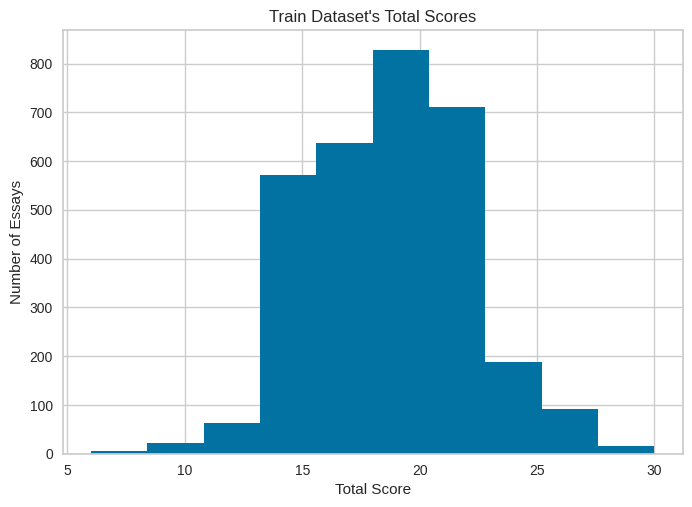

In [30]:
df_train["score_sum"].hist()
plt.title("Train Dataset's Total Scores")
plt.xlabel("Total Score")
plt.ylabel("Number of Essays")
plt.show()

In [31]:
df_rating = copy.deepcopy(df_train[label_cols])
rating_values_array = np.array(df_rating[label_cols])

# standardize
sc = StandardScaler()
rating_values_array_std = sc.fit(rating_values_array).transform(rating_values_array)

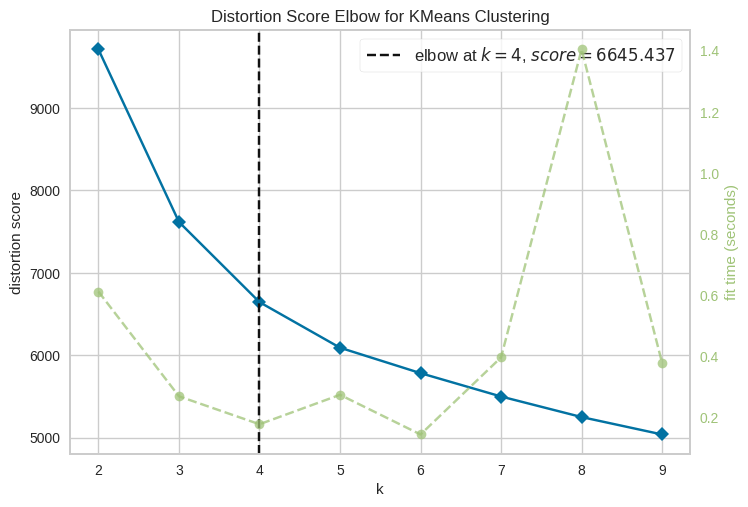

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(rating_values_array_std)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Here is how the Elbow / SSE Plot would look like. As per the plot given below, for n_clusters = 3 that represents the elbow you start seeing diminishing returns by increasing k. The line starts looking linear.

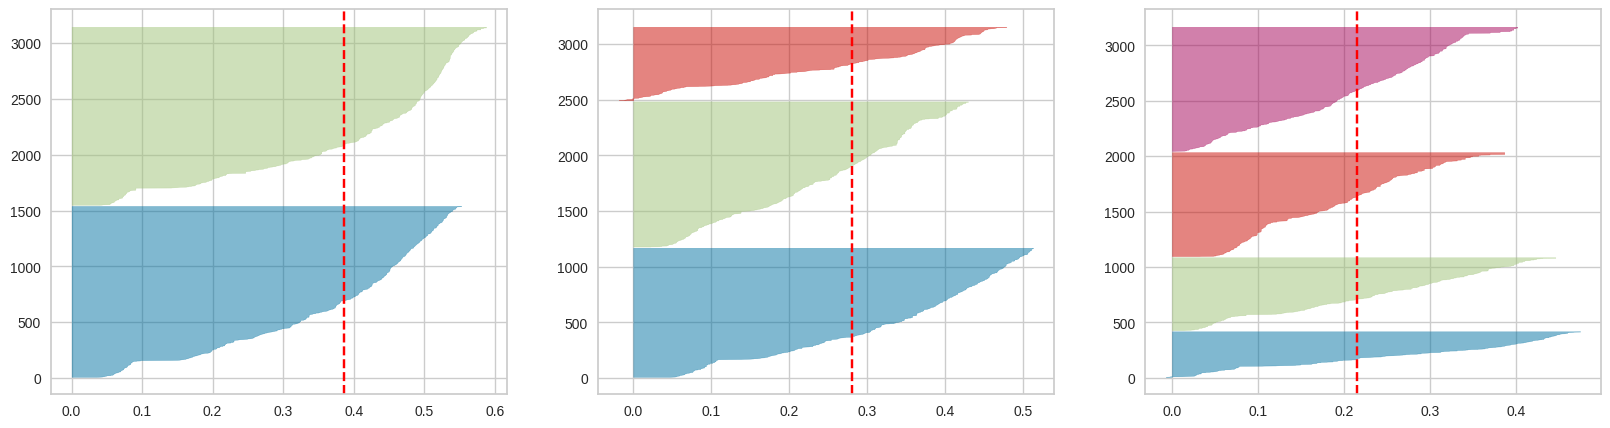

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
for idx, i in enumerate([2, 3, 4]):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    #q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[idx])
    visualizer.fit(rating_values_array_std) 

Given above, the Silhouette plot for n_clusters = 3 looks to be most appropriate than others as it stands well against all the three measuring criteria (scores below average Silhouette score, Wide fluctuations in the size of the plot, and non-uniform thickness).

In [ ]:
km_base = KMeans(n_clusters=3,
           #init='random',
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=1234)

# predict k-means classes
y_km_base = km_base.fit_predict(rating_values_array_std)

# Assigning cluster value to the datafarme
df_train['cluster_id'] = y_km_base

In [ ]:
df_train.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,score_sum,cluster_id
1960,93EF5F755313,To who may concern. The Former British Prime ...,3.5,3.0,3.5,3.5,2.5,2.5,18.5,1
52,04659704890C,Having a good attitude is important if we want...,2.5,3.0,3.0,3.0,3.5,3.0,18.0,1
3570,F1933BF43F45,I agree with this idea and I think it's a good...,3.5,3.0,3.0,3.5,3.5,3.5,20.0,1
3081,DAF9AC30424E,The school day should not be extended even mor...,3.5,3.0,2.5,2.5,3.5,3.0,18.0,1
2738,C972C565A819,Do you want to see a temple made with gold? I ...,3.5,3.0,3.0,2.5,2.5,3.0,17.5,1


We can see that an increase in *k* is associated with a decrease in the within-cluster SSE. 

This is because the examples are closer to the centroid they assigned to.

**The elbow solution**: the optimal *k* is where the within-cluster SSE begings to increase most rapidly.

For this particular example the elbow is at *k=2* so we started with a good number of clusters.


In [ ]:
df_train_cluster0 = df_train[df_train.cluster_id == 0]
df_train_cluster1 = df_train[df_train.cluster_id == 1]
df_train_cluster2 = df_train[df_train.cluster_id == 2]

print(f"Length of cluster 0 : {len(df_train_cluster0)}")
print(f"Length of cluster 1 : {len(df_train_cluster1)}")
print(f"Length of cluster 2 : {len(df_train_cluster2)}")

Length of cluster 0 : 1161
Length of cluster 1 : 1306
Length of cluster 2 : 661


In [ ]:
print(f"Min and max score in cluster 0 are : {np.min(df_train_cluster0['score_sum'])} and {np.max(df_train_cluster0['score_sum'])}")
print(f"Min and Max score in cluster 1 are : {np.min(df_train_cluster1['score_sum'])} and {np.max(df_train_cluster1['score_sum'])}")
print(f"Min and Max score in cluster 2 are : {np.min(df_train_cluster2['score_sum'])} and {np.max(df_train_cluster2['score_sum'])}")

Min and max score in cluster 0 are : 6.0 and 17.0
Min and Max score in cluster 1 are : 17.5 and 21.5
Min and Max score in cluster 2 are : 21.5 and 30.0


The cluster is divided based on the distribution of the data. Low-scores are in one bucket, medium scores are placed in another and top scrores are placed in the higher bucket.

# **Model parameter setup**

************************
Iteration : 1
Parameters...
Epochs : 5
Batch size : 4
Learning rate : 1e-05
Validation split : 0.2
Dropout : 0.1
Number of hidden layers : 1
Hidden layer node count : 64
Retrain layer count : 0
************************
k-fold : 1
length of train data : 2502
length of validation data : 626
************************
Building model...


Number of trainable parameters : 0
Number of non-trainable parameters : 134899968
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 128)]        0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  134899968  ['input_ids[0][0]',              
 el)                            thPoolingAndCrossAt               'attention_masks[0][0]']        
                                tentions(last_hidde                                               
            

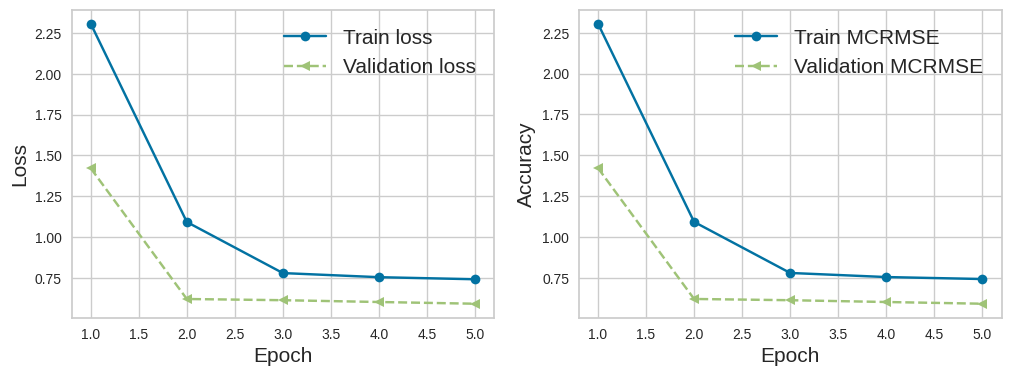

Evaluating mode...


25/25 [==============================] - 7s 269ms/step - loss: 0.7816 - MCRMSE: 0.7845

Test Loss : 0.78%

Test Accuracy :  0.78%
Model prediction...
25/25 [==============================] - 9s 264ms/step
Plotting model structure...
Appending to kpi list...
Saving the model...
************************
Iteration : 1
Parameters...
Epochs : 5
Batch size : 4
Learning rate : 1e-05
Validation split : 0.2
Dropout : 0.1
Number of hidden layers : 1
Hidden layer node count : 64
Retrain layer count : 0
************************
k-fold : 2
length of train data : 2502
length of validation data : 626
************************
Building model...
Number of trainable parameters : 0
Number of non-trainable parameters : 134899968
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []

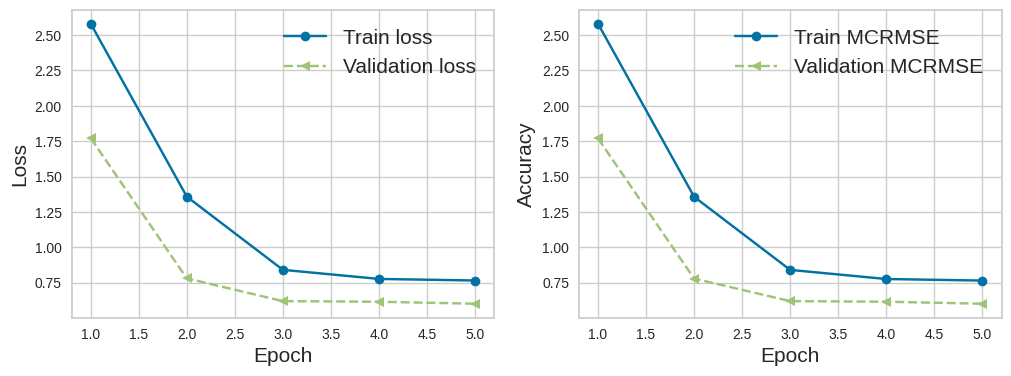

Evaluating mode...
25/25 [==============================] - 7s 268ms/step - loss: 0.8729 - MCRMSE: 0.8762

Test Loss : 0.87%

Test Accuracy :  0.88%
Model prediction...
25/25 [==============================] - 9s 264ms/step
Plotting model structure...
Appending to kpi list...
Saving the model...
************************
Iteration : 1
Parameters...
Epochs : 5
Batch size : 4
Learning rate : 1e-05
Validation split : 0.2
Dropout : 0.1
Number of hidden layers : 1
Hidden layer node count : 64
Retrain layer count : 0
************************
k-fold : 3
length of train data : 2502
length of validation data : 626
************************
Building model...
Number of trainable parameters : 0
Number of non-trainable parameters : 134899968
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]   

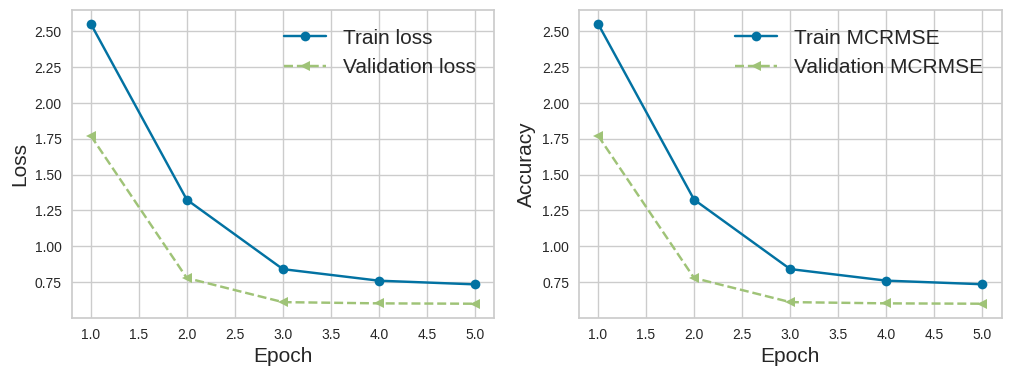

Evaluating mode...
25/25 [==============================] - 7s 265ms/step - loss: 0.7871 - MCRMSE: 0.7899

Test Loss : 0.79%

Test Accuracy :  0.79%
Model prediction...
25/25 [==============================] - 10s 267ms/step
Plotting model structure...
Appending to kpi list...
Saving the model...
************************
Iteration : 1
Parameters...
Epochs : 5
Batch size : 4
Learning rate : 1e-05
Validation split : 0.2
Dropout : 0.1
Number of hidden layers : 1
Hidden layer node count : 64
Retrain layer count : 0
************************
k-fold : 4
length of train data : 2503
length of validation data : 625
************************
Building model...
Number of trainable parameters : 0
Number of non-trainable parameters : 134899968
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]  

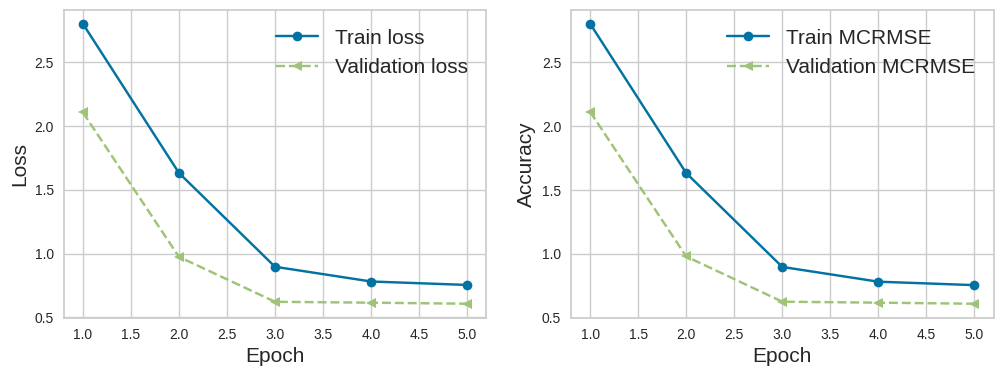

Evaluating mode...
25/25 [==============================] - 7s 266ms/step - loss: 0.8674 - MCRMSE: 0.8704

Test Loss : 0.87%

Test Accuracy :  0.87%
Model prediction...
25/25 [==============================] - 9s 263ms/step
Plotting model structure...
Appending to kpi list...
Saving the model...
************************
Iteration : 1
Parameters...
Epochs : 5
Batch size : 4
Learning rate : 1e-05
Validation split : 0.2
Dropout : 0.1
Number of hidden layers : 1
Hidden layer node count : 64
Retrain layer count : 0
************************
k-fold : 5
length of train data : 2503
length of validation data : 625
************************
Building model...
Number of trainable parameters : 0
Number of non-trainable parameters : 134899968
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]   

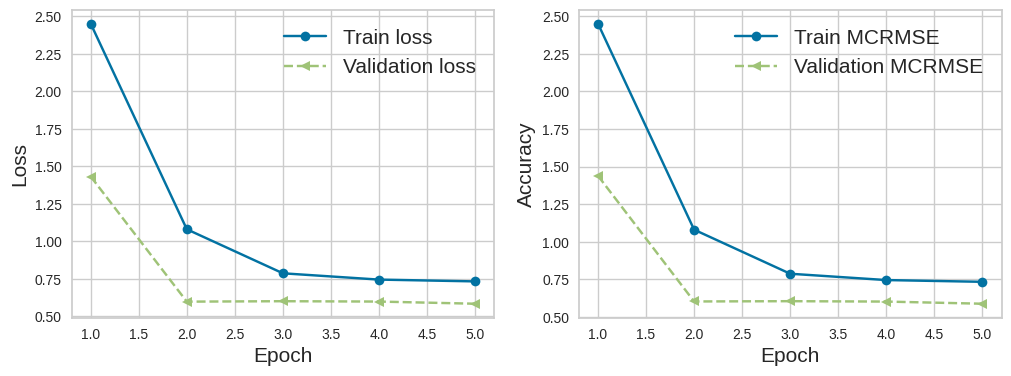

Evaluating mode...
25/25 [==============================] - 7s 267ms/step - loss: 0.7540 - MCRMSE: 0.7566

Test Loss : 0.75%

Test Accuracy :  0.76%
Model prediction...
25/25 [==============================] - 11s 266ms/step
Plotting model structure...
Appending to kpi list...
Saving the model...
************************
Iteration : 2
Parameters...
Epochs : 5
Batch size : 4
Learning rate : 1e-05
Validation split : 0.2
Dropout : 0.1
Number of hidden layers : 1
Hidden layer node count : 64
Retrain layer count : 6
************************
k-fold : 1
length of train data : 2502
length of validation data : 626
************************
Building model...
Retrain layers: 
 ['_11', '_10', '_9', '_8', '_7', '_6']
Number of trainable parameters : 0
Number of non-trainable parameters : 134899968
$$$ tf_roberta_model_5/roberta/encoder/layer_._6/attention/self/query/kernel:0 True
$$$ tf_roberta_model_5/roberta/encoder/layer_._6/attention/self/query/bias:0 True
$$$ tf_roberta_model_5/roberta/encoder/

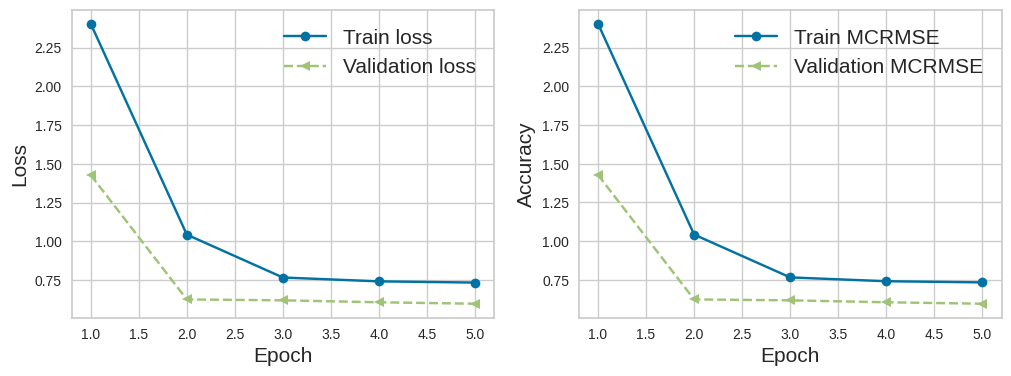

Evaluating mode...
25/25 [==============================] - 7s 270ms/step - loss: 0.7545 - MCRMSE: 0.7560

Test Loss : 0.75%

Test Accuracy :  0.76%
Model prediction...
25/25 [==============================] - 9s 266ms/step
Plotting model structure...
Appending to kpi list...
Saving the model...
************************
Iteration : 2
Parameters...
Epochs : 5
Batch size : 4
Learning rate : 1e-05
Validation split : 0.2
Dropout : 0.1
Number of hidden layers : 1
Hidden layer node count : 64
Retrain layer count : 6
************************
k-fold : 2
length of train data : 2502
length of validation data : 626
************************
Building model...
Retrain layers: 
 ['_11', '_10', '_9', '_8', '_7', '_6']
Number of trainable parameters : 0
Number of non-trainable parameters : 134899968
$$$ tf_roberta_model_6/roberta/encoder/layer_._6/attention/self/query/kernel:0 True
$$$ tf_roberta_model_6/roberta/encoder/layer_._6/attention/self/query/bias:0 True
$$$ tf_roberta_model_6/roberta/encoder/l

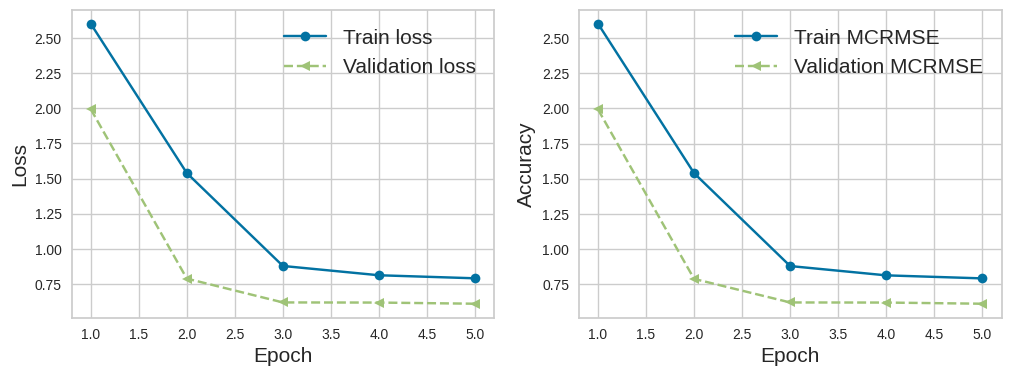

Evaluating mode...
25/25 [==============================] - 7s 265ms/step - loss: 0.7997 - MCRMSE: 0.8026

Test Loss : 0.80%

Test Accuracy :  0.80%
Model prediction...
25/25 [==============================] - 11s 265ms/step
Plotting model structure...
Appending to kpi list...
Saving the model...
************************
Iteration : 2
Parameters...
Epochs : 5
Batch size : 4
Learning rate : 1e-05
Validation split : 0.2
Dropout : 0.1
Number of hidden layers : 1
Hidden layer node count : 64
Retrain layer count : 6
************************
k-fold : 3
length of train data : 2502
length of validation data : 626
************************
Building model...
Retrain layers: 
 ['_11', '_10', '_9', '_8', '_7', '_6']
Number of trainable parameters : 0
Number of non-trainable parameters : 134899968
$$$ tf_roberta_model_7/roberta/encoder/layer_._6/attention/self/query/kernel:0 True
$$$ tf_roberta_model_7/roberta/encoder/layer_._6/attention/self/query/bias:0 True
$$$ tf_roberta_model_7/roberta/encoder/

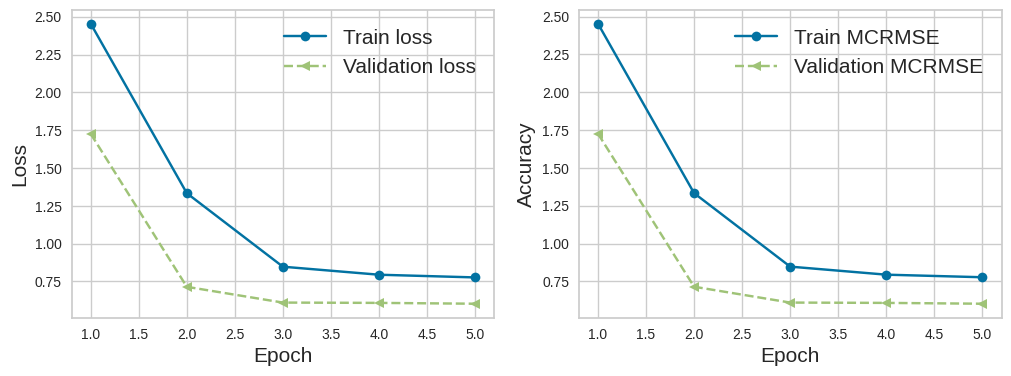

Evaluating mode...
25/25 [==============================] - 7s 267ms/step - loss: 0.7496 - MCRMSE: 0.7515

Test Loss : 0.75%

Test Accuracy :  0.75%
Model prediction...
25/25 [==============================] - 10s 267ms/step
Plotting model structure...
Appending to kpi list...
Saving the model...
************************
Iteration : 2
Parameters...
Epochs : 5
Batch size : 4
Learning rate : 1e-05
Validation split : 0.2
Dropout : 0.1
Number of hidden layers : 1
Hidden layer node count : 64
Retrain layer count : 6
************************
k-fold : 4
length of train data : 2503
length of validation data : 625
************************
Building model...
Retrain layers: 
 ['_11', '_10', '_9', '_8', '_7', '_6']
Number of trainable parameters : 0
Number of non-trainable parameters : 134899968
$$$ tf_roberta_model_8/roberta/encoder/layer_._6/attention/self/query/kernel:0 True
$$$ tf_roberta_model_8/roberta/encoder/layer_._6/attention/self/query/bias:0 True
$$$ tf_roberta_model_8/roberta/encoder/

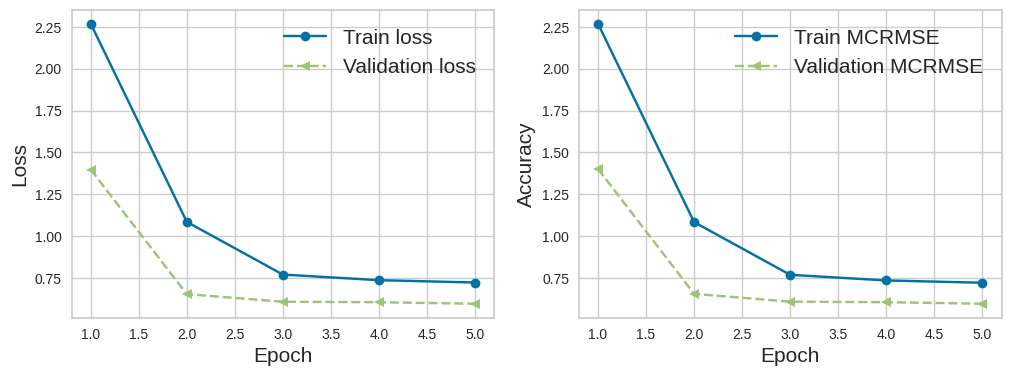

Evaluating mode...
25/25 [==============================] - 7s 268ms/step - loss: 0.7813 - MCRMSE: 0.7844

Test Loss : 0.78%

Test Accuracy :  0.78%
Model prediction...
25/25 [==============================] - 10s 268ms/step
Plotting model structure...
Appending to kpi list...
Saving the model...
************************
Iteration : 2
Parameters...
Epochs : 5
Batch size : 4
Learning rate : 1e-05
Validation split : 0.2
Dropout : 0.1
Number of hidden layers : 1
Hidden layer node count : 64
Retrain layer count : 6
************************
k-fold : 5
length of train data : 2503
length of validation data : 625
************************
Building model...
Retrain layers: 
 ['_11', '_10', '_9', '_8', '_7', '_6']
Number of trainable parameters : 0
Number of non-trainable parameters : 134899968
$$$ tf_roberta_model_9/roberta/encoder/layer_._6/attention/self/query/kernel:0 True
$$$ tf_roberta_model_9/roberta/encoder/layer_._6/attention/self/query/bias:0 True
$$$ tf_roberta_model_9/roberta/encoder/

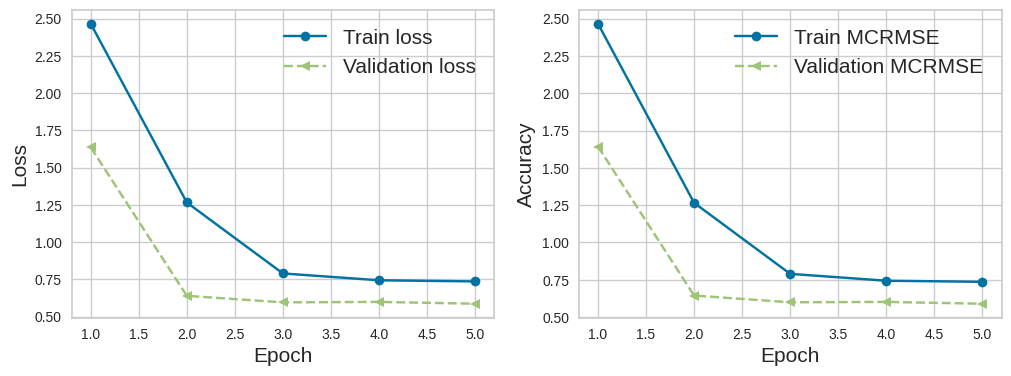

Evaluating mode...
25/25 [==============================] - 7s 266ms/step - loss: 0.7791 - MCRMSE: 0.7818

Test Loss : 0.78%

Test Accuracy :  0.78%
Model prediction...
25/25 [==============================] - 10s 266ms/step
Plotting model structure...
Appending to kpi list...
Saving the model...
************************
Iteration : 3
Parameters...
Epochs : 5
Batch size : 4
Learning rate : 1e-05
Validation split : 0.2
Dropout : 0.1
Number of hidden layers : 1
Hidden layer node count : 64
Retrain layer count : 12
************************
k-fold : 1
length of train data : 2502
length of validation data : 626
************************
Building model...
Number of trainable parameters : 134899968
Number of non-trainable parameters : 0
Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]

626/626 [==============================] - 162s 185ms/step - loss: 0.9983 - MCRMSE: 0.9980 - val_loss: 0.5599 - val_MCRMSE: 0.5596
Epoch 2/5
626/626 [==============================] - 104s 166ms/step - loss: 0.8027 - MCRMSE: 0.8027 - val_loss: 0.5016 - val_MCRMSE: 0.5011
Epoch 3/5
626/626 [==============================] - 102s 162ms/step - loss: 0.7461 - MCRMSE: 0.7459 - val_loss: 0.5007 - val_MCRMSE: 0.5005
Epoch 4/5
626/626 [==============================] - 101s 162ms/step - loss: 0.7387 - MCRMSE: 0.7387 - val_loss: 0.4930 - val_MCRMSE: 0.4926
Epoch 5/5
626/626 [==============================] - 102s 162ms/step - loss: 0.7002 - MCRMSE: 0.7002 - val_loss: 0.4816 - val_MCRMSE: 0.4815
                   0         1         2         3         4
loss        0.998270  0.802666  0.746100  0.738684  0.700207
MCRMSE      0.997990  0.802690  0.745877  0.738744  0.700213
val_loss    0.559854  0.501566  0.500735  0.492950  0.481647
val_MCRMSE  0.559603  0.501130  0.500544  0.492632  0.481511


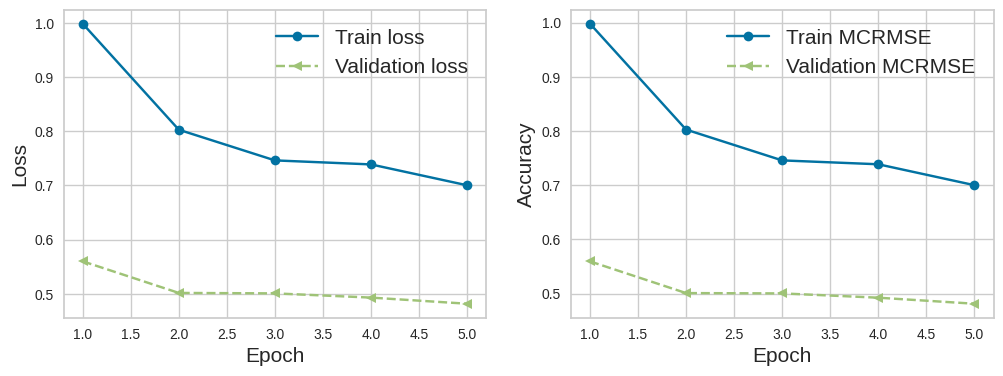

Evaluating mode...
25/25 [==============================] - 7s 275ms/step - loss: 1.1617 - MCRMSE: 1.1653

Test Loss : 1.16%

Test Accuracy :  1.17%
Model prediction...
25/25 [==============================] - 10s 270ms/step
Plotting model structure...
Appending to kpi list...
Saving the model...
************************
Iteration : 3
Parameters...
Epochs : 5
Batch size : 4
Learning rate : 1e-05
Validation split : 0.2
Dropout : 0.1
Number of hidden layers : 1
Hidden layer node count : 64
Retrain layer count : 12
************************
k-fold : 2
length of train data : 2502
length of validation data : 626
************************
Building model...
Number of trainable parameters : 134899968
Number of non-trainable parameters : 0
Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]

626/626 [==============================] - 160s 178ms/step - loss: 0.9741 - MCRMSE: 0.9739 - val_loss: 0.5676 - val_MCRMSE: 0.5676
Epoch 2/5
626/626 [==============================] - 104s 166ms/step - loss: 0.7720 - MCRMSE: 0.7719 - val_loss: 0.5163 - val_MCRMSE: 0.5160
Epoch 3/5
626/626 [==============================] - 104s 165ms/step - loss: 0.7184 - MCRMSE: 0.7181 - val_loss: 0.4904 - val_MCRMSE: 0.4900
Epoch 4/5
626/626 [==============================] - 103s 164ms/step - loss: 0.6966 - MCRMSE: 0.6966 - val_loss: 0.4909 - val_MCRMSE: 0.4905
Epoch 5/5
626/626 [==============================] - 104s 165ms/step - loss: 0.6740 - MCRMSE: 0.6740 - val_loss: 0.4969 - val_MCRMSE: 0.4963
                   0         1         2         3         4
loss        0.974127  0.772026  0.718369  0.696605  0.673963
MCRMSE      0.973900  0.771868  0.718097  0.696606  0.674007
val_loss    0.567559  0.516262  0.490386  0.490893  0.496914
val_MCRMSE  0.567597  0.516036  0.489966  0.490471  0.496345


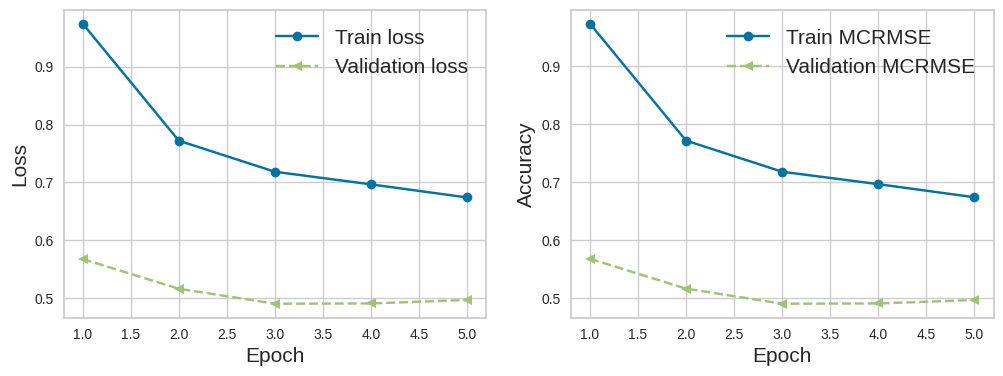

Evaluating mode...
25/25 [==============================] - 7s 274ms/step - loss: 1.4805 - MCRMSE: 1.4847

Test Loss : 1.48%

Test Accuracy :  1.48%
Model prediction...
25/25 [==============================] - 10s 269ms/step
Plotting model structure...
Appending to kpi list...
Saving the model...
************************
Iteration : 3
Parameters...
Epochs : 5
Batch size : 4
Learning rate : 1e-05
Validation split : 0.2
Dropout : 0.1
Number of hidden layers : 1
Hidden layer node count : 64
Retrain layer count : 12
************************
k-fold : 3
length of train data : 2502
length of validation data : 626
************************
Building model...
Number of trainable parameters : 134899968
Number of non-trainable parameters : 0
Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]

626/626 [==============================] - 157s 178ms/step - loss: 0.7744 - MCRMSE: 0.7744 - val_loss: 0.4960 - val_MCRMSE: 0.4959
Epoch 2/5
626/626 [==============================] - 103s 165ms/step - loss: 0.6347 - MCRMSE: 0.6347 - val_loss: 0.5395 - val_MCRMSE: 0.5396
Epoch 3/5
626/626 [==============================] - 102s 163ms/step - loss: 0.6161 - MCRMSE: 0.6163 - val_loss: 0.5776 - val_MCRMSE: 0.5776
Epoch 4/5
626/626 [==============================] - 101s 161ms/step - loss: 0.5948 - MCRMSE: 0.5948 - val_loss: 0.4807 - val_MCRMSE: 0.4808
Epoch 5/5
626/626 [==============================] - 102s 164ms/step - loss: 0.5930 - MCRMSE: 0.5935 - val_loss: 0.4709 - val_MCRMSE: 0.4713
                   0         1         2         3         4
loss        0.774353  0.634718  0.616140  0.594835  0.592956
MCRMSE      0.774363  0.634731  0.616337  0.594765  0.593513
val_loss    0.495980  0.539497  0.577623  0.480739  0.470934
val_MCRMSE  0.495853  0.539636  0.577616  0.480804  0.471335


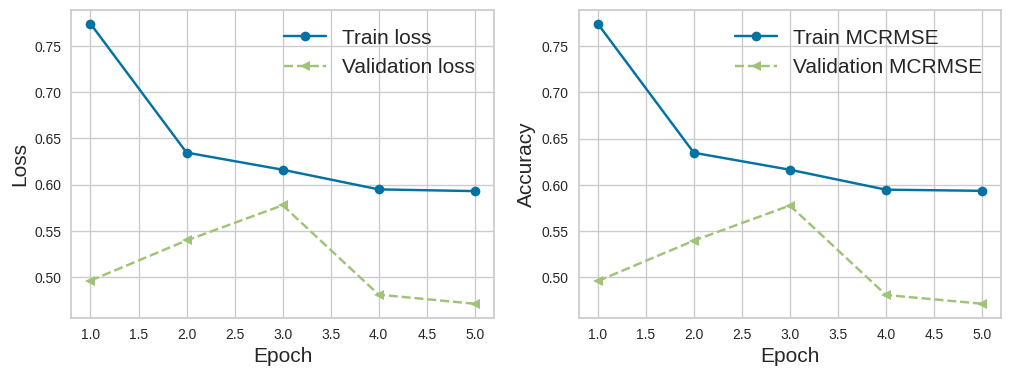

Evaluating mode...
25/25 [==============================] - 7s 273ms/step - loss: 1.5417 - MCRMSE: 1.5459

Test Loss : 1.54%

Test Accuracy :  1.55%
Model prediction...
25/25 [==============================] - 10s 273ms/step
Plotting model structure...
Appending to kpi list...
Saving the model...
************************
Iteration : 3
Parameters...
Epochs : 5
Batch size : 4
Learning rate : 1e-05
Validation split : 0.2
Dropout : 0.1
Number of hidden layers : 1
Hidden layer node count : 64
Retrain layer count : 12
************************
k-fold : 4
length of train data : 2503
length of validation data : 625
************************
Building model...
Number of trainable parameters : 134899968
Number of non-trainable parameters : 0
Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]

626/626 [==============================] - 158s 180ms/step - loss: 0.6891 - MCRMSE: 0.6892 - val_loss: 0.5366 - val_MCRMSE: 0.5371
Epoch 2/5
626/626 [==============================] - 103s 164ms/step - loss: 0.5831 - MCRMSE: 0.5830 - val_loss: 0.5713 - val_MCRMSE: 0.5703
Epoch 3/5
626/626 [==============================] - 103s 165ms/step - loss: 0.5752 - MCRMSE: 0.5751 - val_loss: 0.5868 - val_MCRMSE: 0.5857
Epoch 4/5
626/626 [==============================] - 103s 164ms/step - loss: 0.5557 - MCRMSE: 0.5557 - val_loss: 0.4843 - val_MCRMSE: 0.4843
Epoch 5/5
626/626 [==============================] - 102s 164ms/step - loss: 0.5438 - MCRMSE: 0.5437 - val_loss: 0.4780 - val_MCRMSE: 0.4778
                   0         1         2         3         4
loss        0.689143  0.583086  0.575162  0.555719  0.543766
MCRMSE      0.689219  0.583036  0.575141  0.555662  0.543741
val_loss    0.536621  0.571327  0.586761  0.484265  0.478008
val_MCRMSE  0.537076  0.570340  0.585681  0.484293  0.477817


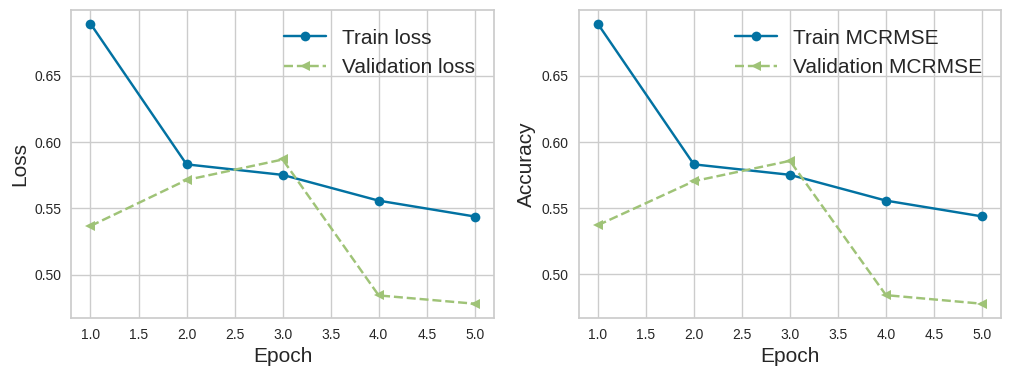

Evaluating mode...
25/25 [==============================] - 7s 271ms/step - loss: 1.0486 - MCRMSE: 1.0520

Test Loss : 1.05%

Test Accuracy :  1.05%
Model prediction...
25/25 [==============================] - 10s 271ms/step
Plotting model structure...
Appending to kpi list...
Saving the model...
************************
Iteration : 3
Parameters...
Epochs : 5
Batch size : 4
Learning rate : 1e-05
Validation split : 0.2
Dropout : 0.1
Number of hidden layers : 1
Hidden layer node count : 64
Retrain layer count : 12
************************
k-fold : 5
length of train data : 2503
length of validation data : 625
************************
Building model...
Number of trainable parameters : 134899968
Number of non-trainable parameters : 0
Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]

626/626 [==============================] - 159s 181ms/step - loss: 0.7769 - MCRMSE: 0.7769 - val_loss: 0.5163 - val_MCRMSE: 0.5185
Epoch 2/5
626/626 [==============================] - 104s 166ms/step - loss: 0.6625 - MCRMSE: 0.6624 - val_loss: 0.5045 - val_MCRMSE: 0.5064
Epoch 3/5
626/626 [==============================] - 104s 166ms/step - loss: 0.6378 - MCRMSE: 0.6378 - val_loss: 0.5110 - val_MCRMSE: 0.5122
Epoch 4/5
626/626 [==============================] - 104s 166ms/step - loss: 0.6108 - MCRMSE: 0.6108 - val_loss: 0.4974 - val_MCRMSE: 0.4981
Epoch 5/5
626/626 [==============================] - 103s 165ms/step - loss: 0.5973 - MCRMSE: 0.5973 - val_loss: 0.4692 - val_MCRMSE: 0.4697
                   0         1         2         3         4
loss        0.776896  0.662458  0.637831  0.610788  0.597272
MCRMSE      0.776936  0.662437  0.637804  0.610804  0.597297
val_loss    0.516274  0.504518  0.511040  0.497398  0.469172
val_MCRMSE  0.518523  0.506383  0.512200  0.498125  0.469705


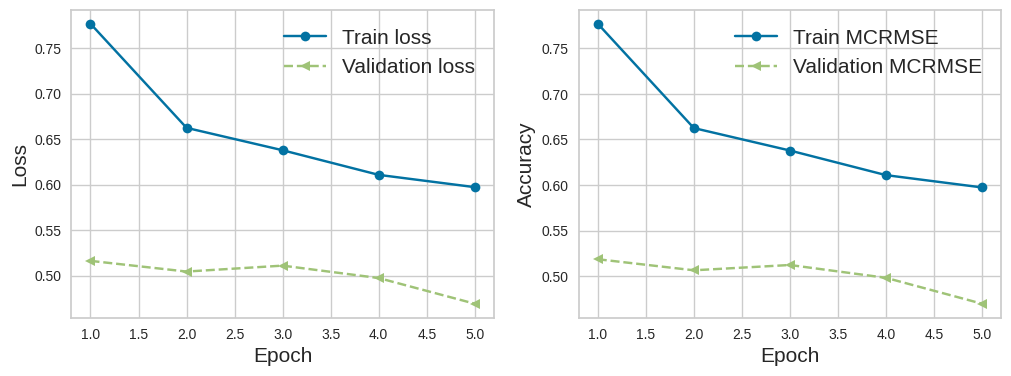

Evaluating mode...
25/25 [==============================] - 7s 274ms/step - loss: 1.1889 - MCRMSE: 1.1928

Test Loss : 1.19%

Test Accuracy :  1.19%
Model prediction...
25/25 [==============================] - 10s 272ms/step
Plotting model structure...
Appending to kpi list...
Saving the model...


In [ ]:
# Combining the two clusters' data
df_train = pd.concat([df_train_cluster0, df_train_cluster1, df_train_cluster2])

# shuffling them back again
shuffle = np.random.permutation(np.arange(df_train.shape[0]))
df_train = df_train.iloc[shuffle]


MCRMSE_list = []

'''
rating_cluster has two values 0 and 1.
We are doing k fold with stratification using rating_cluster.
We introduced this new column to split on as as our data ouput is multi class
and multi label with continuous values and traditional k fold split does not
support that.
This new column will help us to see if our model is performing better for which 
group : above or below average.
'''
for param_val_model_name in model_name_list:

    for idx, param_entry in enumerate(param_list):
    
        param_val_epoch = param_entry['epochs']
        param_val_batch_size = param_entry['batch_size']
        param_val_learning_rate = param_entry['learning_rate']
        param_val_validation_split = param_entry['validation_split']
        param_val_dropout = param_entry['dropout']
        param_val_number_of_hidden_layers = param_entry['number_of_hidden_layers']
        param_val_hidden_layer_node_count = param_entry['hidden_layer_node_count']
        param_val_retrain_layer_count = param_entry['retrain_layer_count']

        for kfold, (train_indices, val_indices) in enumerate(StratifiedKFold(n_splits     = number_of_splits, 
                                                                             shuffle      = True, 
                                                                             random_state = random_state
                                                                             ).split(df_train['cluster_id'].values.tolist(), 
                                                                                     df_train['cluster_id'].values.tolist()
                                                                                    )
                                                            ):
            print("************************")
            print(f"Model : {param_val_model_name}")
            print(f"Iteration : {idx + 1}")
            print("Parameters...")
            print(f"Epochs : {param_val_epoch}")
            print(f"Batch size : {param_val_batch_size}")
            print(f"Learning rate : {param_val_learning_rate}")
            print(f"Validation split : {param_val_validation_split}")
            print(f"Dropout : {param_val_dropout}")
            print(f"Number of hidden layers : {param_val_number_of_hidden_layers}")
            print(f"Hidden layer node count : {param_val_hidden_layer_node_count}")
            print(f"Retrain layer count : {param_val_retrain_layer_count}")
            print(f"k-fold : {kfold + 1}")
            print(f"length of train data : {len(train_indices)}")
            print(f"length of validation data : {len(val_indices)}")
            print("************************")
            
            # Model building
            print("Building model...")
            regression_model = build_regression_model(loss                    = 'MCRMSE',
                                                      param_val_model_name    = model_name, 
                                                      dense_dim               = dense_dim, 
                                                      MAX_LEN                 = MAX_LEN,
                                                      learning_rate           = param_val_learning_rate,
                                                      dropout                 = param_val_dropout,
                                                      number_of_hidden_layers = param_val_number_of_hidden_layers,
                                                      hidden_layer_node_count = param_val_hidden_layer_node_count,
                                                      retrain_layer_count     = param_val_retrain_layer_count
                                                     )
        
            # Model fitting
            print("Fitting model...")
            df_history = model_fit(model            = regression_model, 
                                   df_train         = df_train, 
                                   train_indices    = train_indices,
                                   val_indices      = val_indices,
                                   model_name       = param_val_model_name, 
                                   MAX_LEN          = MAX_LEN,
                                   epochs           = param_val_epoch,
                                   batch_size       = param_val_batch_size,
                                   validation_split = param_val_validation_split
                                  )
            print(df_history.T)

            print("Plotting loss and MCRMSE...")
            custom_plot(df         = df_history, 
                        model_name = param_val_model_name, 
                        kpi_name   = 'MCRMSE', 
                        kpi_string = 'MCRMSE'
                       )

            # Prep for model evaluation with test data
            print("Evaluating mode...")
            test_encoded_input_ids, test_encoded_attention_masks = text_encode(texts      = df_test['full_text'], 
                                                                               model_name = param_val_model_name, 
                                                                               max_len    = MAX_LEN
                                                                              )
            # Model evaluation
            test_loss, test_accuracy = evaluate_model(regression_model, 
                                                      y_test, 
                                                      test_encoded_input_ids, 
                                                      test_encoded_attention_masks
                                                     )

            # Model prediction
            print("Model prediction...")
            df_prediction, df_comparison = predict_model(regression_model, 
                                                         df_test, 
                                                         test_encoded_input_ids, 
                                                         test_encoded_attention_masks, 
                                                         label_cols
                                                        )

            print("Plotting model structure...")
            keras.utils.plot_model(regression_model, 
                                   show_shapes      = False, 
                                   show_dtype       = False, 
                                   show_layer_names = True, 
                                   dpi              = 90
                                  )

            print("Appending to kpi list...")
            temp_dict = {'model_name'                  : param_val_model_name,
                         'iteration'                   : idx + 1,
                         'epoch'                       : param_val_epoch,
                         'batch_size'                  : param_val_batch_size,
                         'learning_rate'               : param_val_learning_rate,
                         'validation_split'            : param_val_validation_split,
                         'dropout'                     : param_val_dropout,
                         'number_of_hidden_layers'     : param_val_number_of_hidden_layers,
                         'hidden_layer_node_count'     : param_val_hidden_layer_node_count,
                         'retrain_layer_count'         : param_val_retrain_layer_count,
                         'fold'                        : kfold + 1, 
                         'train_loss'                  : df_history.iloc[-1][0],
                         'train_accuracy'              : df_history.iloc[-1][1],
                         'val_loss'                    : df_history.iloc[-1][2],
                         'val_accuracy'                : df_history.iloc[-1][3],
                         'test_loss'                   : test_loss,
                         'test_accuracy'               : test_accuracy
                        }
            MCRMSE_list.append(temp_dict)
            
            # Saving the model
            print("Saving the model...")
            model_file_name = 'regression_model_' + param_val_model_name.tolower() + '_iter_' + str(idx + 1) + '_kfold_' + str(kfold + 1) + ".h5"
            regression_model.save(model_file_name)

In [ ]:
kpi_col_list = ['model_name',
                'iteration',
                'epoch_val',
                'batch_size_val',
                'learning_rate_val',
                'validation_split_val',
                'dropout_val',
                'number_of_hidden_layers_val',
                'hidden_layer_node_count_val',
                'retrain_layer_count_val',
                'fold', 
                'train_loss', 
                'train_accuracy', 
                'val_loss', 
                'val_accuracy', 
                'test_loss', 
                'test_accuracy'
               ]
df_MCRMSE = pd.DataFrame(MCRMSE_list, columns = kpi_col_list)    
df_MCRMSE.to_csv("kpi_stats_bertweet.csv", index = False)
df_MCRMSE    

,model_name,iteration,epoch_val,batch_size_val,learning_rate_val,validation_split_val,dropout_val,number_of_hidden_layers_val,hidden_layer_node_count_val,retrain_layer_count_val,fold,train_loss,train_accuracy,val_loss,val_accuracy,test_loss,test_accuracy
0,roberta-base,1,5,4,0.00001,0.2,0.1,1,64,0,1,0.741670,0.742377,0.591907,0.591907,0.781593,0.784462
1,roberta-base,1,5,4,0.00001,0.2,0.1,1,64,0,2,0.765100,0.765077,0.600957,0.600957,0.872868,0.876244
2,roberta-base,1,5,4,0.00001,0.2,0.1,1,64,0,3,0.734848,0.735293,0.600056,0.600056,0.787107,0.789851
3,roberta-base,1,5,4,0.00001,0.2,0.1,1,64,0,4,0.754408,0.754333,0.607483,0.607483,0.867434,0.870374
4,roberta-base,1,5,4,0.00001,0.2,0.1,1,64,0,5,0.733578,0.733726,0.584822,0.584822,0.754021,0.756575
5,roberta-base,2,5,4,0.00001,0.2,0.1,1,64,6,1,0.734218,0.734550,0.597819,0.597819,0.754502,0.756037
6,roberta-base,2,5,4,0.00001,0.2,0.1,1,64,6,2,0.789934,0.789772,0.608879,0.608879,0.799719,0.802592
7,roberta-base,2,5,4,0.00001,0.2,0.1,1,64,6,3,0.776351,0.777078,0.602436,0.602436,0.749601,0.751523
8,roberta-base,2,5,4,0.00001,0.2,0.1,1,64,6,4,0.722698,0.722643,0.595995,0.595995,0.781264,0.784376
9,roberta-base,2,5,4,0.00001,0.2,0.1,1,64,6,5,0.735912,0.735956,0.586080,0.586080,0.779081,0.781827


In [ ]:
print("Average test accuracy and loss...")
df_MCRMSE.groupby(['model_name', 'iteration']).agg({'test_loss'      : [np.mean, np.min, np.max],  
                                                    'test_accuracy'  : [np.mean, np.min, np.max] 
                                                   }
                                                  )

Average test accuracy and loss...


test_loss                     test_accuracy            \
                            mean      amin      amax          mean      amin   
model_name   iteration                                                         
roberta-base 1          0.812605  0.754021  0.872868      0.815501  0.756575   
             2          0.772833  0.749601  0.799719      0.775271  0.751523   
             3          1.284276  1.048567  1.541704      1.288117  1.051982   

                                  
                            amax  
model_name   iteration            
roberta-base 1          0.876244  
             2          0.802592  
             3          1.545852